<a href="https://colab.research.google.com/github/samp3209/MachineLearning/blob/main/MLFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [113]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [114]:
df = pd.read_csv('property.csv')


# Data Fixing

In [115]:
#Shrinking the pnd column to have smallest amount of unique values
df['PrimaryNeighborhoodDescription'].unique()
pndlist = []
for i in df['PrimaryNeighborhoodDescription']:
  if i == 'south end':
    pndlist.append('SO.END')
  elif i == 'southern end':
    pndlist.append('south end')
  elif i == 'NEW NO END':
    pndlist.append('new north end')
  elif i == 'SO HILL SECT':
    pndlist.append('southern hill')
  elif i == 'DOWNTOWN':
    pndlist.append('downtown')
  elif i == 'UNIV HILL':
    pndlist.append('UVM hill area')
  elif i == 'OLD NO END':
    pndlist.append('old north end')
  else:
    pndlist.append(i)

df['PrimaryNeighborhoodDescription'] = pndlist
df['PrimaryNeighborhoodDescription'].unique()

array(['new north end', 'INTERVALE', 'old north end', 'NRTH AVE EXT',
       'NNE MIDRANGE', 'NNE WATERVIEW', 'NNE Small Complex',
       'NNE BASE COMPLEX', 'waterfront', 'Starr Farm Beach', '0',
       'WATERFRONT', 'lakeview tr', 'DWT SMALL COMPLEX', 'northern hill',
       'RIVERSIDE AV', 'NORTH ST', 'DWT WATERVIEW', 'DWT MIDRANGE',
       'DWT BASE COMPLEX', 'CBD', 'DOWNTN APTS', 'HILL APTS',
       'CHURCH ST MK', 'downtown', 'southern hill', 'UVM hill area',
       'UVM CAMPUS', 'SO.END', 'south end', 'DWT MID LEVEL',
       'SE SAMLL COMPLEX', 'SE MIDRANGE', 'INDUSTRIAL P', 'SHELBURNE ST',
       'DWT HIGH END', 'SE WATERFRONT', 'SE BASE COMPLEX', 'SE HIGN END',
       'DWT MED/HIGH END', 'RCO ZONE', 'EAST AVENUE'], dtype=object)

In [116]:
#Fixing LastSaleDate and StoryHeight Columns
#df.dtypes
df['YearBuilt'] = df['YearBuilt'].fillna(0).astype(int)
df['LastSaleDate'] = pd.to_datetime(df['LastSaleDate'])
df.dtypes
#df['StoryHeight'].unique()
story = []

for i in df['StoryHeight']:

  if i == 'Two Sty':
    story.append('2')
    
  elif i== 'One Sty':
    story.append('1')
    
  elif i == 'Three Sty':
    story.append('3')
    
  elif i == 'Four Sty':
    story.append('4')
    
  elif i == 'Five Sty':
    story.append('5')
    
  elif i == 'Six Sty':
    story.append('6')
    
  elif i == '9 Story':
    story.append('9')
  
  elif i == '4 story':
    story.append('4')
    
  elif i == '4 Story':
    story.append('4')
   
  elif i == '7 Story':
    story.append('7')
    
  elif i == '6 Story':
    story.append('6')
    
  elif i == '5 Stories':
    story.append('5')
   
  elif i == '8 Story':
    story.append('8')
    
  else:
      story.append(i)
df['StoryHeight'] = story
df['StoryHeight'] = df['StoryHeight'].astype(float)
df['StoryHeight']
#story

0        1.50
1         NaN
2        1.50
3        2.00
4        1.75
         ... 
11403    1.00
11404    1.00
11405    1.00
11406    4.00
11407    1.00
Name: StoryHeight, Length: 11408, dtype: float64

In [117]:
#fixing number columns to remove unneccessary characters
df['BuildingValue'] = df['BuildingValue'].astype(str)
df['BuildingValue'] = df['BuildingValue'].str.replace(',','')
df['BuildingValue'] = df['BuildingValue'].str.replace('$','')
df['BuildingValue'] = df['BuildingValue'].astype(float)
######
df['LandValue'] = df['LandValue'].astype(str)
df['LandValue'] = df['LandValue'].str.replace(',','')
df['LandValue'] = df['LandValue'].str.replace('$','')
df['LandValue'] = df['LandValue'].astype(float)
######

########
df['LastSaleAmount'] = df['LastSaleAmount'].astype(str)
df['LastSaleAmount'] = df['LastSaleAmount'].str.replace(',','')
df['LastSaleAmount'] = df['LastSaleAmount'].str.replace('$','')
df['LastSaleAmount'] = df['LastSaleAmount'].astype(float)
########
#square feet removal
########
df['LotSqFeet'] = df['LotSqFeet'].astype(str)
df['LotSqFeet'] = df['LotSqFeet'].str.replace(' sqft','')
df['LotSqFeet'] = df['LotSqFeet'].str.replace(',','')
df['LotSqFeet'] = df['LotSqFeet'].astype(int)
#########
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].astype(str)
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].str.replace(' sqft','')
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].str.replace(',','')
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].astype(int)
#########
#########
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].astype(str)
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].str.replace(' sqft','')
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].str.replace(',','')
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()


In [118]:
#Adding numeric scale to physical condition
#print(df['PhysicalCondition'].unique())
nums = []
for i in df['PhysicalCondition']:
  if i == 'Fair':
    nums.append(1)
  elif i == 'Fair-Avg':
    nums.append(2)
  elif i == 'Average':
    nums.append(3)
  elif i == 'Avg-Good':
    nums.append(4)
  elif i == 'Good':
    nums.append(5)
  elif i == 'Good-VG':
    nums.append(6)
  else:
    nums.append(7)
df['PhysicalCondition'] = nums
df['PhysicalCondition'] = df['PhysicalCondition'].astype(int)
df['PhysicalCondition'].sample(20)

1533     3
9425     5
7754     2
8065     5
9145     1
2371     7
10618    3
630      5
4673     3
5031     3
3139     4
9880     3
3702     4
2030     3
6140     3
11231    7
1858     3
5152     3
2606     3
7087     3
Name: PhysicalCondition, dtype: int64

In [119]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative

['PropertyId',
 'LastSaleDate',
 'LastSaleAmount',
 'LotSqFeet',
 'BuildingValue',
 'LandValue',
 'BuildingNo',
 'YearBuilt',
 'StoryHeight',
 'BuildingGrossAreaSF',
 'BuildingFinishedSf',
 'TotalRooms',
 'Bedrooms',
 'FullBaths',
 'HalfBaths',
 'ResidentialUnits',
 'CommercialUnits',
 'PhysicalCondition',
 'DepreciationPct']

In [120]:
#dropping columns 
#df = df.drop(columns=['TaxParcelId', 'VermontSPAN', 'StreetAddressFormatted', 'PrimaryLandUseCode', 'FoundationType', 'Quality'])


# Model Building

In [121]:
df_numerics_only = df.select_dtypes(include=np.number)
df_numerics_only = df_numerics_only.drop(columns=['BuildingValue'])

In [122]:
df_numerics_only.isnull().sum(axis = 0)

PropertyId                 0
LastSaleAmount          2688
LotSqFeet                  0
LandValue                  0
BuildingNo                 0
YearBuilt                  0
StoryHeight              387
BuildingGrossAreaSF        0
BuildingFinishedSf         0
TotalRooms                 0
Bedrooms                   0
FullBaths                  0
HalfBaths                  0
ResidentialUnits        1195
CommercialUnits        10438
PhysicalCondition          0
DepreciationPct            0
dtype: int64

In [123]:
#

df_numerics_only['StoryHeight'] = df_numerics_only['StoryHeight'].fillna(1)
df_numerics_only['ResidentialUnits'] =df_numerics_only['ResidentialUnits'].fillna(1)
df_numerics_only['CommercialUnits'] =df_numerics_only['CommercialUnits'].fillna(1)
df_numerics_only['ResidentialUnits']

0         1.0
1         1.0
2         1.0
3         2.0
4         1.0
         ... 
11403     1.0
11404     1.0
11405     1.0
11406    44.0
11407     1.0
Name: ResidentialUnits, Length: 11408, dtype: float64

In [124]:
df_numerics_only.mean()

PropertyId               5619.044968
LastSaleAmount         454221.033097
LotSqFeet               39399.466602
LandValue              217904.988604
BuildingNo                  1.112027
YearBuilt                1880.528138
StoryHeight                 1.725802
BuildingGrossAreaSF      5750.646476
BuildingFinishedSf       3478.175403
TotalRooms                  5.832311
Bedrooms                    2.818548
FullBaths                   2.264288
HalfBaths                   0.633065
ResidentialUnits            2.174264
CommercialUnits             1.433292
PhysicalCondition           3.686360
DepreciationPct            25.297557
dtype: float64

In [125]:
#filling nans with the average
df_numerics_only['LastSaleAmount'] = df_numerics_only['LastSaleAmount'].fillna(454221)

In [126]:
#building model inputs
Y = df['BuildingValue']
X = df_numerics_only
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_test=np.array(X_test)
X_test=np.array(X_test)

In [127]:
df_numerics_only['LastSaleAmount']

0         454221.0
1          16255.0
2         454221.0
3         454221.0
4         454221.0
           ...    
11403     175000.0
11404     175000.0
11405      76000.0
11406    1000000.0
11407     500000.0
Name: LastSaleAmount, Length: 11408, dtype: float64

In [128]:
df['BuildingValue']

0        1425800.0
1              0.0
2         182600.0
3         345500.0
4         217600.0
           ...    
11403      83500.0
11404      83500.0
11405      59400.0
11406     536200.0
11407     468400.0
Name: BuildingValue, Length: 11408, dtype: float64

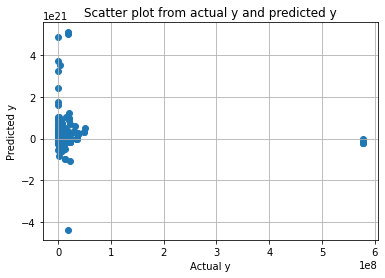

Mean Absolute percentage Error : 3.5122918627444455e+34
Mean Absolute Error : 6.7856130149414e+19
r2 score is : -1.4121106376221224e+26
y is: 4976     223900.0
4462     320600.0
2817    6585900.0
2442    7840600.0
9346    1466800.0
          ...    
8549     284500.0
9483     337500.0
1430    1096000.0
3020     407500.0
8247     203100.0
Name: BuildingValue, Length: 3423, dtype: float64
predicted was: [ 1.47447858e+19  4.37917125e+19  2.47899590e+20 ... -1.60594701e+19
  4.65784875e+19  1.86310273e+19]


In [129]:
#SGD Regressor
n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)
#clf = KNeighborsRegressor(n_neighbors=1)
#clf = LinearRegression()
clf_.fit(X_train.values, Y_train.values)

y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)

#Data Exploration

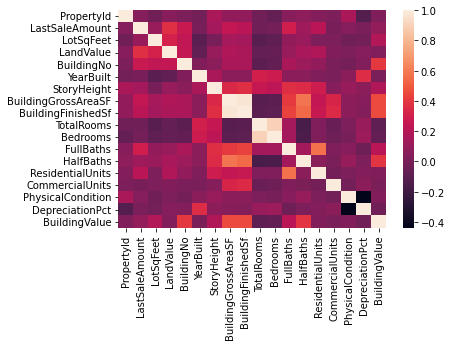

In [130]:
#correleation matrix
corrdata = df_numerics_only
corrdata['BuildingValue'] = df['BuildingValue']

corr = corrdata.corr()
sns.heatmap(corr)

In [135]:
cor_target = abs(corr["BuildingValue"])
#Selecting 5 highly correlated features
relevant_features = cor_target[cor_target>0.33]
relevant_features
#buildingno, grossarea, finishedsf, half baths
#features chosen for the best correleation to the target variable 

BuildingNo             0.403770
BuildingGrossAreaSF    0.459051
BuildingFinishedSf     0.458151
HalfBaths              0.387801
BuildingValue          1.000000
Name: BuildingValue, dtype: float64

# Model with selected features

In [140]:
X = df_numerics_only[['BuildingNo', 'BuildingGrossAreaSF', 'HalfBaths', 'BuildingFinishedSf']]

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_test=np.array(X_test)
X_test=np.array(X_test)

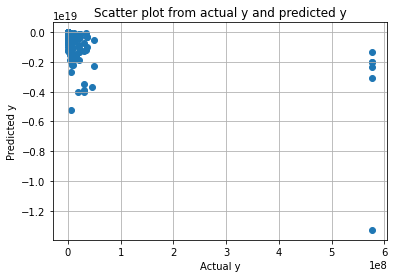

Mean Absolute percentage Error : 4.7682952452631493e+30
Mean Absolute Error : 1.2051720911628878e+17
r2 score is : -2.2593984300292204e+20
y is: 715      227000.0
1071     882200.0
8668     242100.0
4450     200700.0
8268     215300.0
           ...   
4269     203600.0
1426     214900.0
10752    358600.0
5539     197300.0
3039     336600.0
Name: BuildingValue, Length: 3423, dtype: float64
predicted was: [-6.34387365e+16 -2.26681690e+17 -1.22642939e+17 ... -7.17107935e+16
 -3.87964982e+16 -7.21187127e+16]


In [144]:
#SGD Regressor
n_iter=1000
clf_ = SGDRegressor(max_iter=n_iter)
#clf = KNeighborsRegressor(n_neighbors=1)
#clf = LinearRegression()
clf_.fit(X_train.values, Y_train.values)

y_pred_sksgd=clf_.predict(X_test)
plt.scatter(Y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Absolute percentage Error :',mean_absolute_percentage_error(Y_test, y_pred_sksgd))
print('Mean Absolute Error :',mean_absolute_error(Y_test, y_pred_sksgd))
print('r2 score is :', r2_score(Y_test, y_pred_sksgd))
print('y is:', Y_test)
print('predicted was:', y_pred_sksgd)